In [150]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [151]:
df = pd.read_csv("day.csv")

In [152]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [153]:
df.shape

(730, 16)

In [154]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [155]:
# Summary of numeric cols
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [156]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [157]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
# season (1:spring, 2:summer, 3:fall, 4:winter)

def ass_symboling(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
df['season'] = df['season'].apply(ass_symboling)

In [158]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [159]:
# weathersit : 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [160]:
# weathersit : 
#1: Clear, Few clouds, Partly cloudy
#2: Mist, Broken and Few clouds
#3: Light Snow, Light Rain with Thunderstorm and Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

def ass_symboling(x):
    if x==1:
        return 'Clear, Few clouds, Partly cloudy'
    elif x==2:
        return 'Mist, Broken and Few clouds'
    elif x==3:
        return 'Light Snow, Light Rain with Thunderstorm and Scattered clouds'
    
df['weathersit'] = df['weathersit'].apply(ass_symboling)

In [161]:
df['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy                                 463
Mist, Broken and Few clouds                                      246
Light Snow, Light Rain with Thunderstorm and Scattered clouds     21
Name: weathersit, dtype: int64

In [162]:
def ass_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

df[['mnth']] = df[['mnth']].apply(ass_mnth)

In [104]:
df['mnth'].value_counts()

Jan    62
Dec    62
Jul    62
Mar    62
Oct    62
May    62
Aug    62
Sep    60
Nov    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [163]:
def ass_mnth(x):
    return x.map({
        0:'2018',
        1:'2019',
        
    })

df[['yr']] = df[['yr']].apply(ass_mnth)

In [164]:
df['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [166]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [167]:
def ass_mnth(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tues',
        3:'Wed',
        4:'Thrus',
        5:'Fri',
        6:'Sat',
            
    })

df[['weekday']] = df[['weekday']].apply(ass_mnth)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


# Data Visualization

In [110]:
df.describe().columns # numerical col names

Index(['instant', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [111]:
#instant dteday	season yr mnth holiday weekday workingday weathersit temp atemp	hum	windspeed casual registered	cnt
num_col = df[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
num_col.head()

instant       temp     atemp      hum  windspeed  casual  registered   cnt
0        1  14.110847  18.18125  80.5833  10.749882     331         654   985
1        2  14.902598  17.68695  69.6087  16.652113     131         670   801
2        3   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3        4   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4        5   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [112]:
x = num_col.columns
x

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

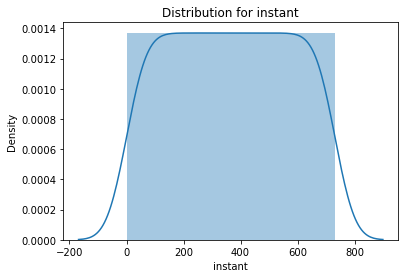

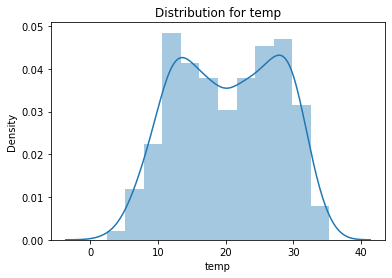

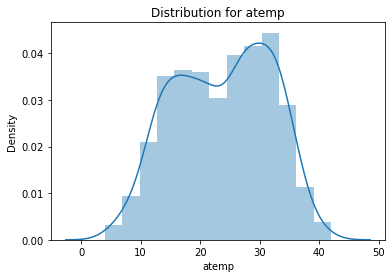

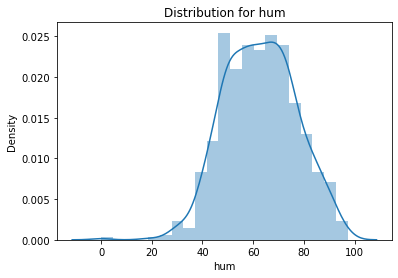

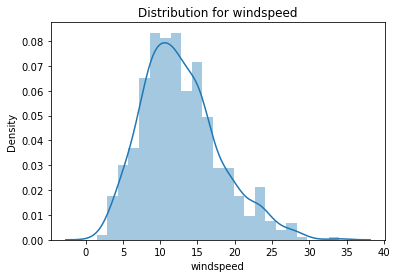

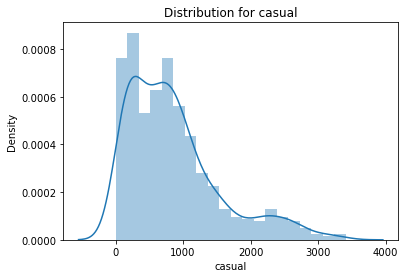

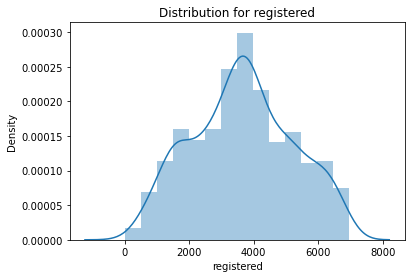

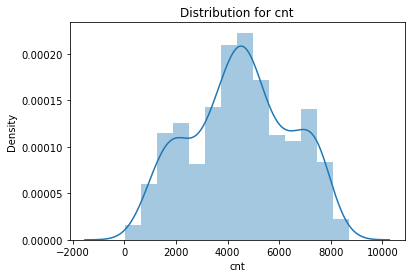

In [113]:
for col in x:
    sns.distplot(df[col])
    plt.title("Distribution for "+col)
    plt.show();


In [114]:
df['dteday'] = df['dteday'].astype('datetime64')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [116]:
# df.select_dtypes(include=['object']).columns
df_categorical = df.select_dtypes(exclude=['float64','int64','datetime64'])

In [117]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [118]:
len(df_categorical.columns)

5

# Visualize Categorical Cols

In [119]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [120]:
cat_df = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
cat_df.head()

season    yr mnth  holiday weekday  workingday  \
0  spring  2018  Jan        0     Mon           1   
1  spring  2018  Jan        0    Tues           1   
2  spring  2018  Jan        0     Wed           1   
3  spring  2018  Jan        0   Thrus           1   
4  spring  2018  Jan        0     Fri           1   

                         weathersit  
0       Mist, Broken and Few clouds  
1       Mist, Broken and Few clouds  
2  Clear, Few clouds, Partly cloudy  
3  Clear, Few clouds, Partly cloudy  
4  Clear, Few clouds, Partly cloudy

In [121]:
cat_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

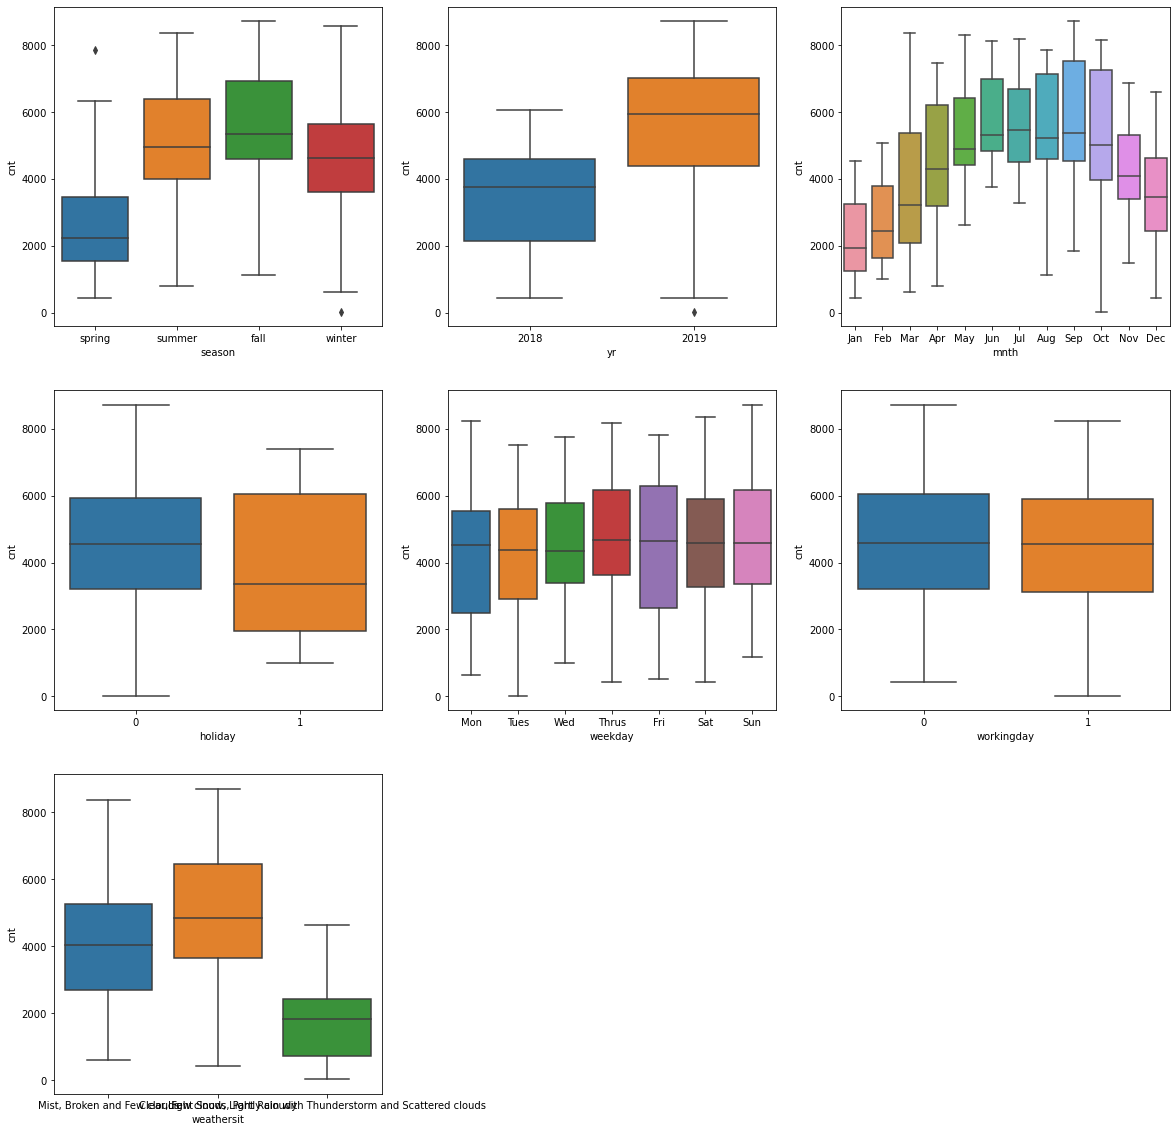

In [127]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1) # plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3,3,2) # plt.subplot(331)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3,3,3) # plt.subplot(331)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3,3,4) # plt.subplot(331)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3,3,5) # plt.subplot(331)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3,3,6) # plt.subplot(331)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(3,3,7) # plt.subplot(331)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show();

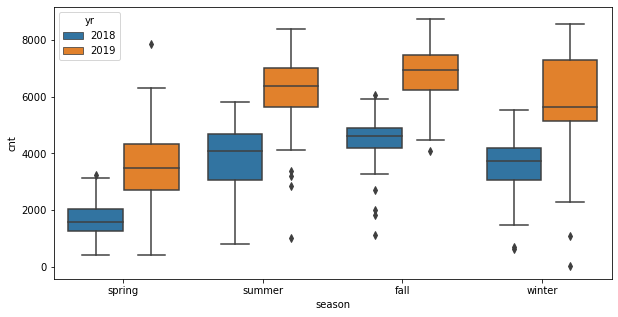

In [123]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='season', y='cnt', hue = 'yr', data=df)
plt.show()

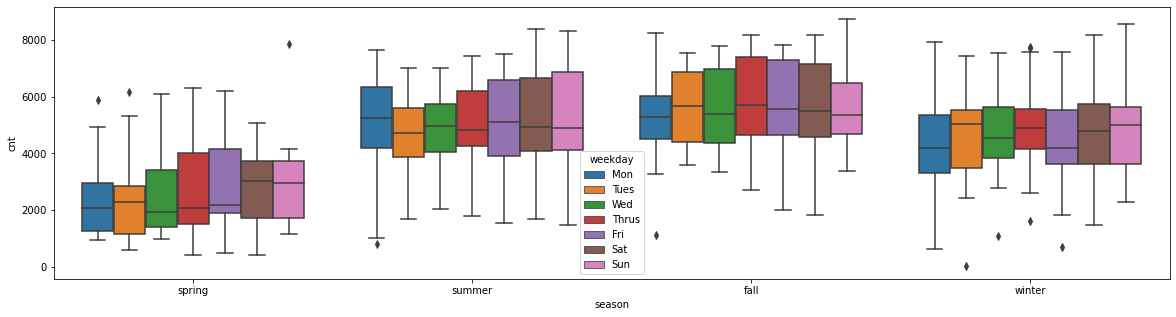

In [130]:
plt.figure(figsize = (20, 5))
sns.boxplot(x='season', y='cnt', hue = 'weekday', data=df)
plt.show()

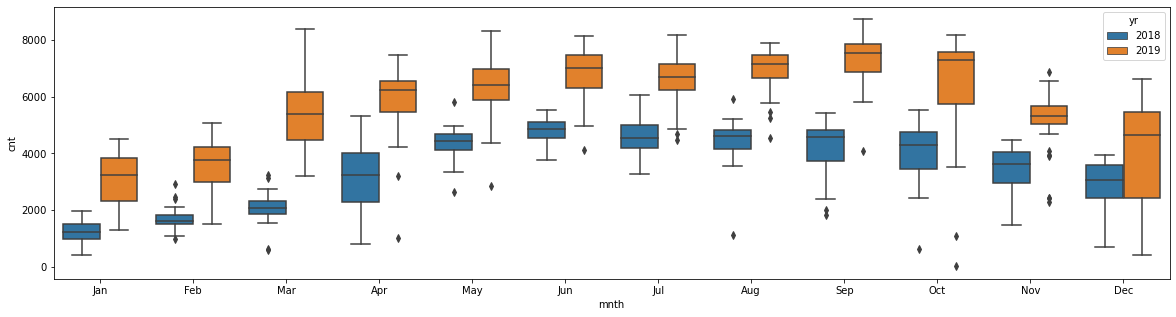

In [132]:
plt.figure(figsize = (20, 5))
sns.boxplot(x='mnth', y='cnt', hue = 'yr', data=df)
plt.show()

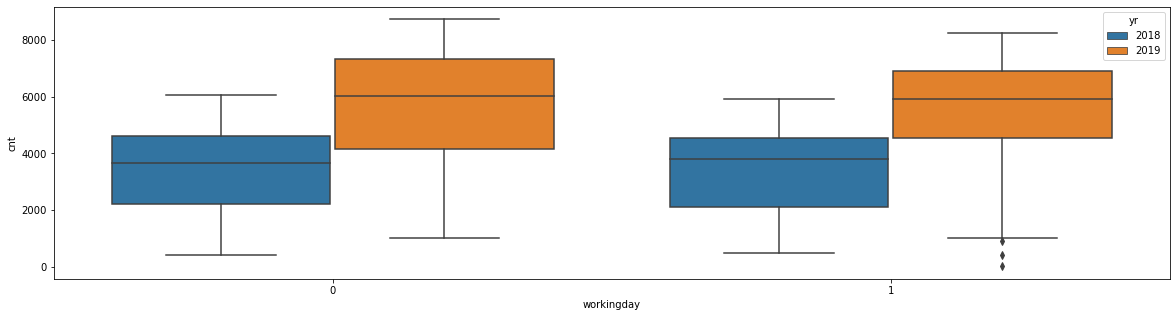

In [169]:
plt.figure(figsize = (20, 5))
sns.boxplot(x='workingday', y='cnt', hue = 'yr', data=df)
plt.show()

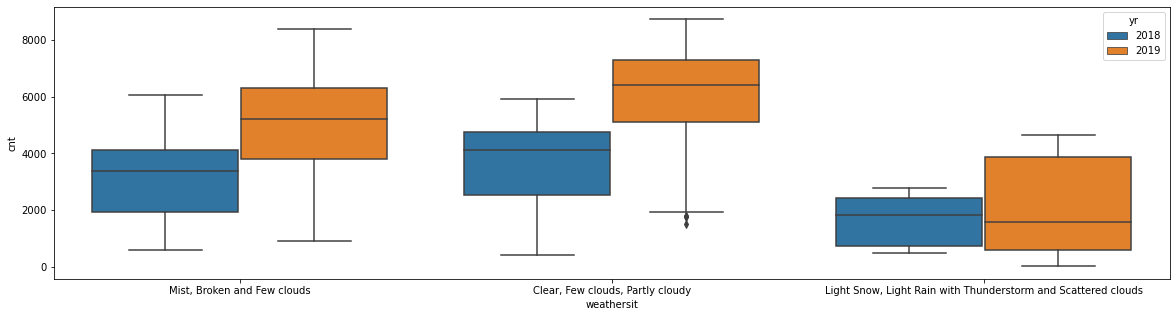

In [170]:

plt.figure(figsize = (20, 5))
sns.boxplot(x='weathersit', y='cnt', hue = 'yr', data=df)
plt.show()

In [32]:
x

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [33]:
x = x[1:]
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [34]:
df[x].head()

temp     atemp      hum  windspeed  casual  registered   cnt
0  14.110847  18.18125  80.5833  10.749882     331         654   985
1  14.902598  17.68695  69.6087  16.652113     131         670   801
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

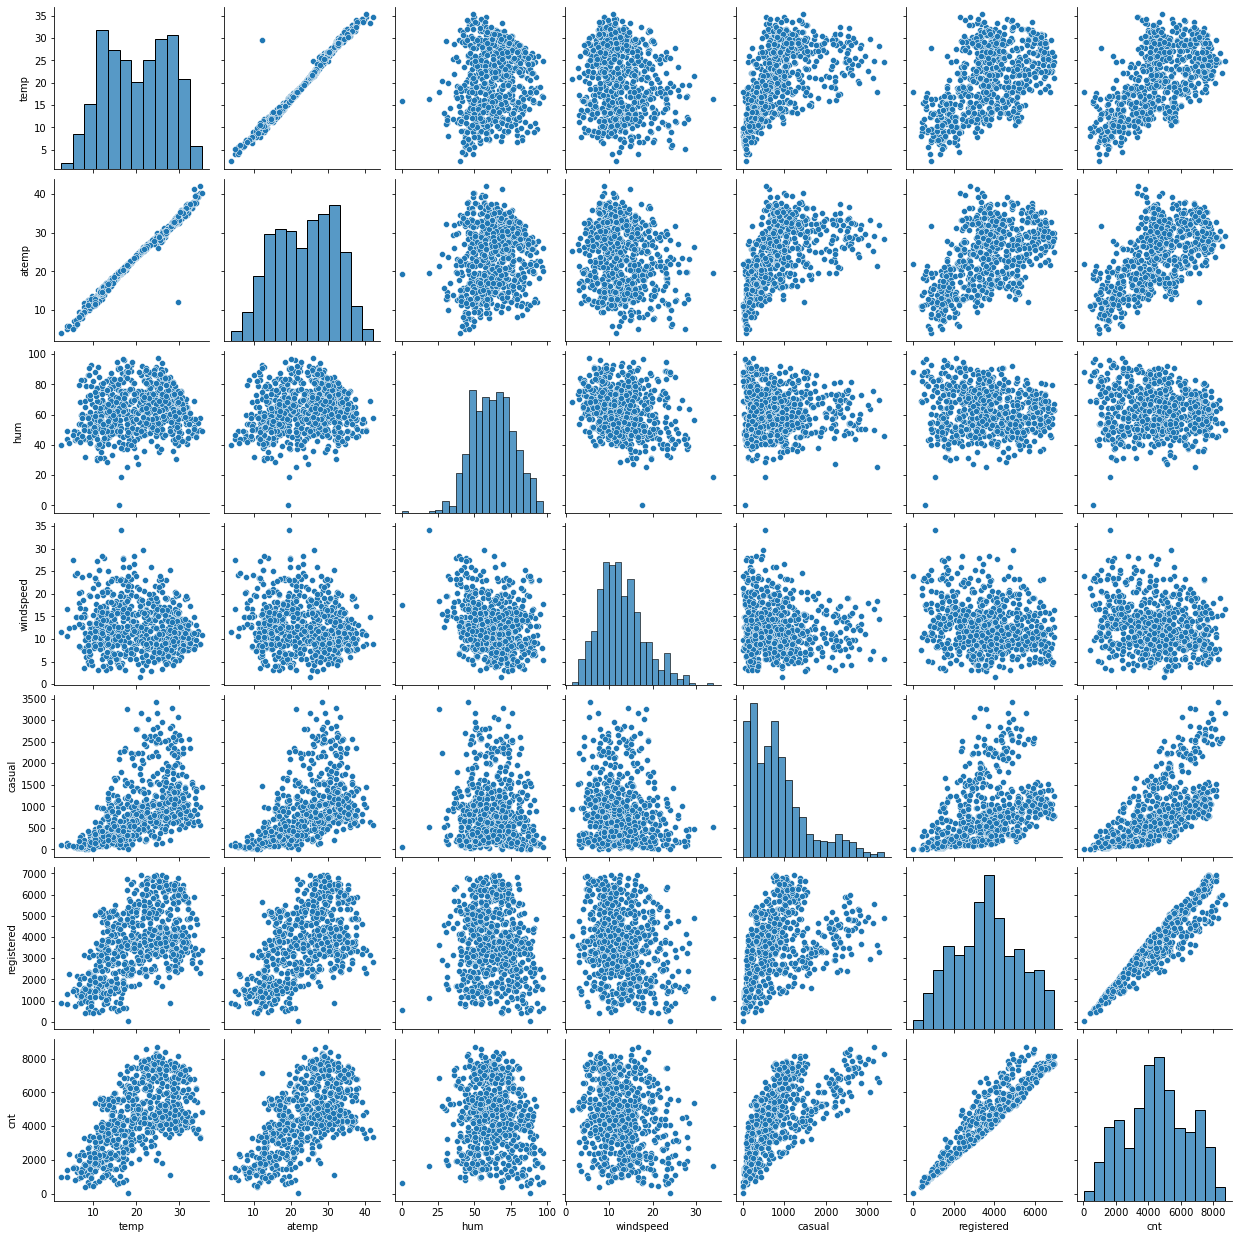

In [35]:
# Analyzing Numerical variables
sns.pairplot(df[x]);

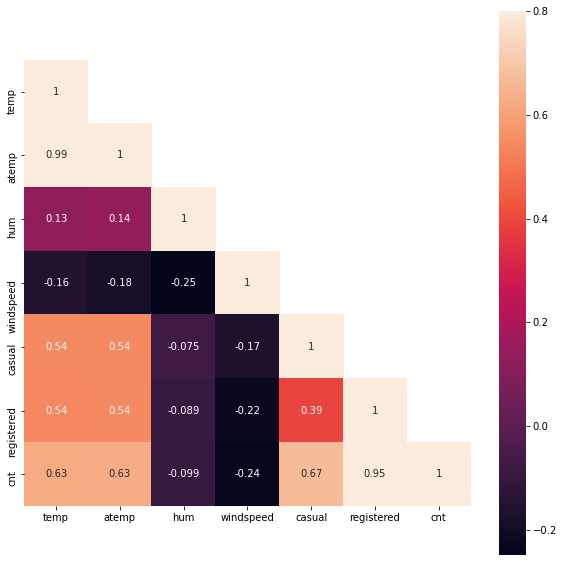

In [36]:
# heatmap
mask = np.array(df[x].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df[x].corr(), mask=mask, vmax=0.8, square=True, annot=True);

In [37]:
# drop atemp col
df.drop('atemp', axis=1,inplace=True)

In [38]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# Data Preparation

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 85.7+ 

In [40]:
# Select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [41]:
# One Hot Encoding - convert into dummies

df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth_Oct  mnth_Sep  \
0         1         0         0         0  ...         0         0   
1         1         0         0         0  ...         0         0   
2         1         0         0         0  ...         0         0   
3         1         0         0         0  ...         0         0   
4         1         0         0         0  ...         0         0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thrus  weekday_Tues  \
0            1            0            0              0             0   
1            0            0            0              0             1   
2            0            0            0              0             0   
3            0            0            0              1             0   
4            0            0            0              0             0   

   weekday_Wed  \
0            0   
1            0   
2            1   
3            0   
4            0   

   weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   weathersit_Mist, Broken and Few clouds  
0                                       1  
1                                       1  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 22 columns]

In [42]:
list(df_categorical.columns)

['season', 'mnth', 'weekday', 'weathersit']

In [43]:
df = df.drop(list(df_categorical.columns),axis=1)

In [44]:
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [45]:
df = pd.concat([df, df_dummies], axis=1)

In [46]:
df.head()

instant     dteday  yr  holiday  workingday       temp      hum  windspeed  \
0        1 2018-01-01   0        0           1  14.110847  80.5833  10.749882   
1        2 2018-02-01   0        0           1  14.902598  69.6087  16.652113   
2        3 2018-03-01   0        0           1   8.050924  43.7273  16.636703   
3        4 2018-04-01   0        0           1   8.200000  59.0435  10.739832   
4        5 2018-05-01   0        0           1   9.305237  43.6957  12.522300   

   casual  registered  ...  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  \
0     331         654  ...         0         0            1            0   
1     131         670  ...         0         0            0            0   
2     120        1229  ...         0         0            0            0   
3     108        1454  ...         0         0            0            0   
4      82        1518  ...         0         0            0            0   

   weekday_Sun  weekday_Thrus  weekday_Tues  weekday_Wed  \
0            0              0             0            0   
1            0              0             1            0   
2            0              0             0            1   
3            0              1             0            0   
4            0              0             0            0   

   weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   weathersit_Mist, Broken and Few clouds  
0                                       1  
1                                       1  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 33 columns]

In [47]:
list(df.columns)

['instant',
 'dteday',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thrus',
 'weekday_Tues',
 'weekday_Wed',
 'weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds',
 'weathersit_Mist, Broken and Few clouds']

In [48]:
#  now drop 'instant' and 'dteday' as they wont be useful for our modeling

df = df.drop(['instant'], axis=1)
df = df.drop(['dteday'], axis=1)
df.head()

yr  holiday  workingday       temp      hum  windspeed  casual  registered  \
0   0        0           1  14.110847  80.5833  10.749882     331         654   
1   0        0           1  14.902598  69.6087  16.652113     131         670   
2   0        0           1   8.050924  43.7273  16.636703     120        1229   
3   0        0           1   8.200000  59.0435  10.739832     108        1454   
4   0        0           1   9.305237  43.6957  12.522300      82        1518   

    cnt  season_spring  ...  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  \
0   985              1  ...         0         0            1            0   
1   801              1  ...         0         0            0            0   
2  1349              1  ...         0         0            0            0   
3  1562              1  ...         0         0            0            0   
4  1600              1  ...         0         0            0            0   

   weekday_Sun  weekday_Thrus  weekday_Tues  weekday_Wed  \
0            0              0             0            0   
1            0              0             1            0   
2            0              0             0            1   
3            0              1             0            0   
4            0              0             0            0   

   weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   weathersit_Mist, Broken and Few clouds  
0                                       1  
1                                       1  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 31 columns]

In [49]:
list(df.columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thrus',
 'weekday_Tues',
 'weekday_Wed',
 'weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds',
 'weathersit_Mist, Broken and Few clouds']

In [50]:
#df.drop(['casual','registered'],axis=1, inplace=True)
#df.columns

# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
list(df.describe().columns)

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thrus',
 'weekday_Tues',
 'weekday_Wed',
 'weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds',
 'weathersit_Mist, Broken and Few clouds']

In [53]:
# ur cols - temp, hum, windspeed
var = ['temp','hum','windspeed']
df[var] = scaler.fit_transform(df[var])

In [54]:
df.head()

yr  holiday  workingday      temp       hum  windspeed  casual  registered  \
0   0        0           1 -0.827613  1.252343  -0.387833     331         654   
1   0        0           1 -0.722069  0.480996   0.748899     131         670   
2   0        0           1 -1.635432 -1.338073   0.745931     120        1229   
3   0        0           1 -1.615560 -0.261577  -0.389769     108        1454   
4   0        0           1 -1.468226 -1.340294  -0.046477      82        1518   

    cnt  season_spring  ...  mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  \
0   985              1  ...         0         0            1            0   
1   801              1  ...         0         0            0            0   
2  1349              1  ...         0         0            0            0   
3  1562              1  ...         0         0            0            0   
4  1600              1  ...         0         0            0            0   

   weekday_Sun  weekday_Thrus  weekday_Tues  weekday_Wed  \
0            0              0             0            0   
1            0              0             1            0   
2            0              0             0            1   
3            0              1             0            0   
4            0              0             0            0   

   weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   weathersit_Mist, Broken and Few clouds  
0                                       1  
1                                       1  
2                                       0  
3                                       0  
4                                       0  

[5 rows x 31 columns]

# Model Building

In [55]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [56]:
X.shape

(730, 30)

In [57]:
y.shape

(730,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
X_train.shape

(584, 30)

In [60]:
X_test.shape

(146, 30)

In [61]:
y_train.shape

(584,)

In [62]:
y_test.shape

(146,)

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
regressor.coef_

array([-4.65597085e-13,  2.08083589e-13,  5.65023076e-13, -6.74100362e-13,
        4.30783198e-13,  2.50193759e-13,  1.00000000e+00,  1.00000000e+00,
        2.28699901e-13,  1.28745161e-13,  1.84896300e-13,  1.76870712e-13,
       -3.00674087e-13, -5.30871159e-14, -9.14390992e-14, -6.76265156e-14,
       -5.47989382e-14,  1.29650900e-13,  1.75293293e-13, -3.88177255e-13,
       -2.72063188e-14, -1.15563240e-14, -3.33254485e-13, -1.45642915e-14,
        1.12204656e-15,  1.36472158e-13, -7.77512361e-14,  1.07448637e-13,
       -1.04641145e-12,  1.02397190e-13])

In [65]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [66]:
coeff_df

Coefficient
yr                                                 -4.655971e-13
holiday                                             2.080836e-13
workingday                                          5.650231e-13
temp                                               -6.741004e-13
hum                                                 4.307832e-13
windspeed                                           2.501938e-13
casual                                              1.000000e+00
registered                                          1.000000e+00
season_spring                                       2.286999e-13
season_summer                                       1.287452e-13
season_winter                                       1.848963e-13
mnth_Aug                                            1.768707e-13
mnth_Dec                                           -3.006741e-13
mnth_Feb                                           -5.308712e-14
mnth_Jan                                           -9.143910e-14
mnth_Jul                                           -6.762652e-14
mnth_Jun                                           -5.479894e-14
mnth_Mar                                            1.296509e-13
mnth_May                                            1.752933e-13
mnth_Nov                                           -3.881773e-13
mnth_Oct                                           -2.720632e-14
mnth_Sep                                           -1.155632e-14
weekday_Mon                                        -3.332545e-13
weekday_Sat                                        -1.456429e-14
weekday_Sun                                         1.122047e-15
weekday_Thrus                                       1.364722e-13
weekday_Tues                                       -7.775124e-14
weekday_Wed                                         1.074486e-13
weathersit_Light Snow, Light Rain with Thunders... -1.046411e-12
weathersit_Mist, Broken and Few clouds              1.023972e-13

In [134]:
y_train = df.pop('cnt')
X_train = df

In [135]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','hum','windspeed']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [136]:
# Check the parameters obtained

lr.params

const        4080.348562
temp          161.383993
hum           -30.844655
windspeed     -71.733160
dtype: float64

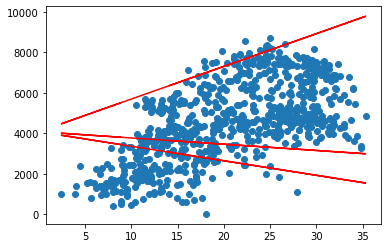

In [139]:
# Let's visualise the data with a scatter plot and the fitted regression line for temp
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 + 161.383993*X_train_lm.iloc[:, 1], 'r')
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 - 30.844655*X_train_lm.iloc[:, 1], 'r')
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 - 71.733160*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [67]:
print(regressor.intercept_)

-2.7284841053187847e-12


In [68]:
# Make predictions

y_pred = regressor.predict(X_test)

In [69]:
cmp = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
cmp.head()

Actual  Predicted
196    5923     5923.0
187    4592     4592.0
14     1248     1248.0
31     1360     1360.0
390    4075     4075.0

In [70]:
# 82

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0776889274432643e-12
Mean Squared Error: 1.8519497447141843e-24
Root Mean Squared Error: 1.360863602538544e-12


In [71]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [72]:
# Adjusted r2

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

1.0 1.0


In [73]:

yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

1.0 1.0


Text(0, 0.5, 'y_pred')

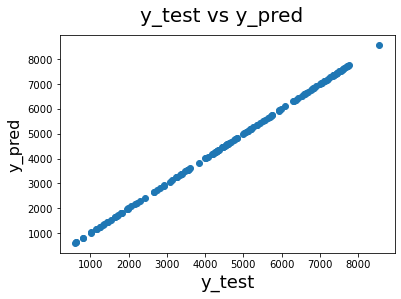

In [147]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# RFE

In [74]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50) # ur case: 20
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thrus', True, 1),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds',
  True,
  1),
 ('weathersit_Mist, Broken and Few clouds', True, 1)]

In [77]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thrus',
       'weekday_Tues', 'weekday_Wed',
       'weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds',
       'weathersit_Mist, Broken and Few clouds'],
      dtype='object')

In [78]:
len(X_train.columns[rfe.support_])

30

In [79]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

yr  holiday  workingday      temp       hum  windspeed  casual  \
239   0        0           1  1.155777 -0.463083   1.473059    1415   
97    0        0           0 -0.873163  1.466128   0.470861     172   
503   1        0           0  0.570645 -1.204693  -1.374597    3410   
642   1        0           0  0.652627 -0.001067  -1.085875    1516   
498   1        0           1  0.424896  1.138130   0.286337     342   

     registered  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
239        2919              0              0  ...         0         0   
97         1299              0              1  ...         0         0   
503        4884              0              1  ...         0         0   
642        6640              0              0  ...         1         0   
498        2501              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thrus  weekday_Tues  \
239            0            0            0              0             1   
97             0            0            1              0             0   
503            0            0            1              0             0   
642            0            1            0              0             0   
498            0            0            0              0             1   

     weekday_Wed  \
239            0   
97             0   
503            0   
642            0   
498            0   

     weathersit_Light Snow, Light Rain with Thunderstorm and Scattered clouds  \
239                                                  0                          
97                                                   0                          
503                                                  0                          
642                                                  0                          
498                                                  0                          

     weathersit_Mist, Broken and Few clouds  
239                                       0  
97                                        1  
503                                       0  
642                                       0  
498                                       1  

[5 rows x 30 columns]

In [80]:
# 93

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [81]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.189e+30
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:45:56   Log-Likelihood:                 14699.
No. Observations:                 584   AIC:                        -2.934e+04
Df Residuals:                     553   BIC:                        -2.920e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [82]:
checkVIF(X_train_new)

Features     VIF
0                                               const  363.58
3                                          workingday   55.28
24                                        weekday_Sat   32.48
25                                        weekday_Sun   31.57
11                                      season_winter   11.20
9                                       season_spring   11.18
4                                                temp    8.73
10                                      season_summer    7.99
20                                           mnth_Nov    7.00
21                                           mnth_Oct    6.97
13                                           mnth_Dec    6.06
15                                           mnth_Jan    5.71
16                                           mnth_Jul    5.70
12                                           mnth_Aug    5.63
8                                          registered    5.62
2                                             holiday    5.55
14                                           mnth_Feb    4.74
22                                           mnth_Sep    4.28
18                                           mnth_Mar    3.31
17                                           mnth_Jun    3.02
1                                                  yr    2.87
7                                              casual    2.77
23                                        weekday_Mon    2.48
5                                                 hum    2.41
19                                           mnth_May    2.24
27                                       weekday_Tues    2.00
30             weathersit_Mist, Broken and Few clouds    1.78
26                                      weekday_Thrus    1.76
28                                        weekday_Wed    1.74
29  weathersit_Light Snow, Light Rain with Thunder...    1.54
6                                           windspeed    1.34

# Residual Analysis of the train data

In [141]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

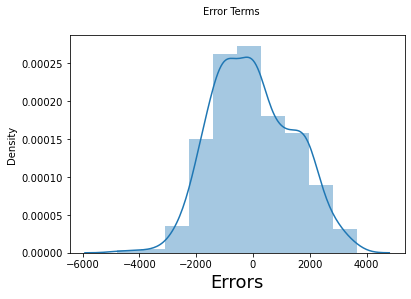

In [143]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label